<a href="https://colab.research.google.com/github/tohnperfect/AIprototype2022/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-data-tables

     |████████████████████████████████| 108 kB 29.4 MB/s 
     |████████████████████████████████| 85 kB 4.0 MB/s 
     |████████████████████████████████| 178 kB 36.6 MB/s 
     |████████████████████████████████| 41 kB 563 kB/s 


# Azure Table (Cloud DB)

1. create DB on Azure Portal
2. insert data
3. query data

In [2]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [4]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=aiprototype;AccountKey=XB1BjLQbooBEMTpnWxF1x9Kxtm9ND5OlCYrNmoW7/RA8Z393mPj4izTNrysYGopTJbpPA+Xsam+BmATbNuGGrg==;EndpointSuffix=core.windows.net')

## Insert data

In [5]:
table_client = table_service.get_table_client(table_name="testdb")

insert by pre-create TableEntity

In [6]:
task = TableEntity()
task[u'PartitionKey'] = u'part1'
task[u'RowKey'] = u'001'
task[u'name'] = u'stat'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 46, 8, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A46%3A08.7168582Z\'"',
 'version': '2019-02-02'}

insert dictionary

In [7]:
task = {u'PartitionKey': u'part1', u'RowKey': u'002',
        u'name': u'python', u'room': u'Online', u'age':3}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 49, 28, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A49%3A29.0834364Z\'"',
 'version': '2019-02-02'}

## Query

### query by partitionkey&rowkey (เลือกข้อมูล)

In [9]:
table_client = table_service.get_table_client(table_name="testdb")

In [8]:
task = table_client.get_entity('part1', '002')
print(task)

{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'python', 'room': 'Online', 'age': 3}


In [10]:
for i in range(10):
    task = {u'PartitionKey': u'partQ', u'RowKey': f'00{i+10}',
        u'name': u'python', u'room': u'Online', u'age':i}
    table_client.create_entity(entity=task)

### query by logic (ดึงข้อมูลมาประมวลผลต่อ)

In [11]:
tasks = table_client.query_entities(query_filter="age gt 5")
print(tasks)

<iterator object azure.core.paging.ItemPaged at 0x7f4eb44392d0>


In [12]:
for t in tasks:
    print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'name': 'stat', 'age': 30}
{'PartitionKey': 'partQ', 'RowKey': '0016', 'name': 'python', 'room': 'Online', 'age': 6}
{'PartitionKey': 'partQ', 'RowKey': '0017', 'name': 'python', 'room': 'Online', 'age': 7}
{'PartitionKey': 'partQ', 'RowKey': '0018', 'name': 'python', 'room': 'Online', 'age': 8}
{'PartitionKey': 'partQ', 'RowKey': '0019', 'name': 'python', 'room': 'Online', 'age': 9}


# Cloud AI

In [13]:
!pip install azure-cognitiveservices-vision-computervision

In [16]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

credentials = CognitiveServicesCredentials('a4a28bc0554b45a2813fa9ccd6551bba')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [33]:
url = "https://aiprototype.blob.core.windows.net/pics/002.png"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces,VisualFeatureTypes.description])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 32, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7f4ea942d410>}


In [39]:
for each_cap in image_analysis.description.captions:
    print(each_cap)

{'additional_properties': {}, 'text': 'a man in a suit pointing', 'confidence': 0.4960801899433136}


In [24]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)


305 305 314 602


In [25]:
import cv2

In [26]:
from matplotlib import pyplot as plt

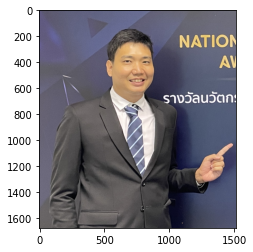

In [28]:
img = cv2.imread('/content/002.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [30]:
img2 = cv2.rectangle(img, (tag.face_rectangle.left, tag.face_rectangle.top), 
              (tag.face_rectangle.left+tag.face_rectangle.width, tag.face_rectangle.top+tag.face_rectangle.height), (0,0,255), 5)

32
Gender.male


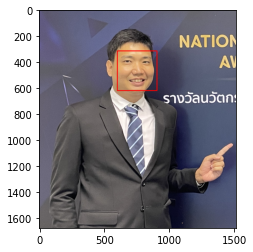

In [32]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)